<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

3. Explore a data set

Browse the CASEarth, NOAA Land-Based Datasets and Products, or Advanced Global Atmospheric Gases Experiment (AGAGE) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in csv, XLS, or XLSX format, and have temporal information.

In [1]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read .tsv data using pd.read_csv
ds = pd.read_csv('Data/PS2/2749432.csv',)
ds.head()

/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,DEW,KB1,RH1,VIS
0,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T00:00:00,5,FM-15,KCQT,V020,NaN,"+0089,5",NaN,NaN,"016000,5,9,9"
1,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T01:00:00,5,FM-15,KCQT,V020,NaN,"+0094,5",NaN,NaN,"016000,5,9,9"
2,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T02:00:00,5,FM-15,KCQT,V020,NaN,"+0094,5",NaN,NaN,"016000,5,9,9"
3,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T03:00:00,5,FM-15,KCQT,V020,NaN,"+0094,5",NaN,NaN,"016000,5,9,9"
4,72287493134,"LOS ANGELES DOWNTOWN USC, CA US",34.0236,-118.2911,54.6,2000-01-01T04:00:00,5,FM-15,KCQT,V020,NaN,"+0089,5",NaN,NaN,"014400,5,9,9"


In [3]:
ds_sel = ds[['DATE','AA1','DEW','VIS']].dropna(axis=0)
ds_sel.head()

,DATE,AA1,DEW,VIS
8929,2001-01-01T09:00:00,"01,0000,9,5","+0122,5","002400,5,9,9"
8930,2001-01-01T10:00:00,"01,0000,9,5","+0122,5","002800,5,9,9"
8931,2001-01-01T11:00:00,"01,0000,9,5","+0117,5","002800,5,9,9"
8932,2001-01-01T12:00:00,"01,0000,9,5","+0111,5","003200,5,9,9"
8933,2001-01-01T13:00:00,"01,0000,9,5","+0094,5","004800,5,9,9"


In [4]:
DATE=ds_sel.DATE.apply(lambda x:pd.to_datetime(x)).to_frame(name='DATE')

In [5]:
LAX=DATE.copy()

In [6]:
VAR = ['AA1','DEW','VIS']
fields=['Hours','Depth','QP_1','QP_2','Dew','QD','VIS','QV']

In [7]:
#for var in VAR:
for a,b in zip([0,1],[2,3]):
    dfs=ds_sel[VAR[0]].apply(lambda x:int(x.split(',')[a])).to_frame(name=fields[a])
    LAX=pd.merge(LAX,dfs,right_index=True,left_index=True)
    
    dfs=ds_sel[VAR[0]].apply(lambda x:(x.split(',')[b])).to_frame(name=fields[b])
    LAX=pd.merge(LAX,dfs,right_index=True,left_index=True)

for x,y,z in zip(VAR[1:],[4,6],[5,7]):
    dfs=ds_sel[x].apply(lambda x:int(x.split(',')[0])).to_frame(name=fields[y])
    LAX=pd.merge(LAX,dfs,right_index=True,left_index=True)
    
    dfs=ds_sel[x].apply(lambda x:(x.split(',')[1])).to_frame(name=fields[z])
    LAX=pd.merge(LAX,dfs,right_index=True,left_index=True)

In [8]:
LAX = LAX.set_index(LAX.DATE)
LAX.head()

,DATE,Hours,QP_1,Depth,QP_2,Dew,QD,VIS,QV
DATE,,,,,,,,,
2001-01-01 09:00:00,2001-01-01 09:00:00,1,9,0,5,122,5,2400,5
2001-01-01 10:00:00,2001-01-01 10:00:00,1,9,0,5,122,5,2800,5
2001-01-01 11:00:00,2001-01-01 11:00:00,1,9,0,5,117,5,2800,5
2001-01-01 12:00:00,2001-01-01 12:00:00,1,9,0,5,111,5,3200,5
2001-01-01 13:00:00,2001-01-01 13:00:00,1,9,0,5,94,5,4800,5


In [31]:
#Daily precipitation
Depth_pass=LAX['Depth'].replace(9999,np.nan).dropna()
print(len(Depth_pass))
Depth_day=Depth_pass.resample('D').sum()
Depth_day

197992


DATE
2001-01-01    0.0
2001-01-02    3.0
2001-01-03    0.0
2001-01-04    0.0
2001-01-05    0.0
             ... 
2021-10-10    0.0
2021-10-11    0.0
2021-10-12    0.0
2021-10-13    0.0
2021-10-14    0.0
Freq: D, Name: Depth, Length: 7592, dtype: float64

In [32]:
# Extreme rainfall
# Wet day rainfall
Depth_wet=Depth_day[Depth_day>1]

year_group=np.asarray(list(Depth_wet.groupby(Depth_wet.index.year))).T[1]

extreme_wet_95=pd.DataFrame({
    'Year':np.arange(2001,2022),
    'Extreme_depth':list(map(lambda data:np.percentile(data,95),year_group)),
})
extreme_wet_95=extreme_wet_95.set_index('Year')

In [34]:
R95TOT=pd.DataFrame({
    'Year':np.arange(2001,2022),
    'R95TOT':
    list(map(lambda data,base:data[data>float(base)].sum(),year_group,extreme_wet_95.values))
})
R95TOT=R95TOT.set_index('Year')

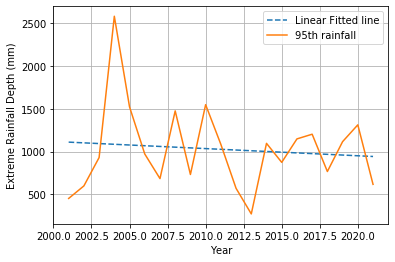

In [36]:
# Trend analysis
lin = stats.linregress(np.arange(2001,2022),extreme_wet_95['Extreme_depth'].values)

fig,ax = plt.subplots()
f = lambda a,b,x: b+a*x
x=np.arange(2001,2022)

ax.plot(x,f(lin.slope,lin.intercept,x),'--',label='Linear Fitted line')
ax.plot(x,extreme_wet_95['Extreme_depth'],label='95th rainfall')
ax.grid()
ax.set_xlabel('Year')
ax.set_ylabel('Extreme Rainfall Depth (mm)')
ax.legend()

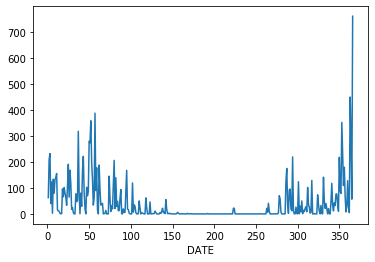

In [37]:
#  Precipitation climatology mean for 2001-2011
Depth_sel=Depth_day.where(Depth_day.index.year.isin(np.arange(2001,2012))).dropna()
Depth_sel.head()
Depth_clim=Depth_sel.groupby(Depth_sel.index.dayofyear).mean()
Depth_clim.plot()

In [40]:
# Rainfall anomaly relative to 2001-2011 mean
year_group=np.asarray(list(Depth_day.groupby(Depth_day.index.year))).T[1]

Depth_anom=pd.concat(
    list(map(
        lambda data:data-Depth_clim.where(Depth_clim.index.isin(data.index.dayofyear)).dropna().values
        ,year_group)
        )
)
Depth_anom

DATE
2001-01-01    -62.636364
2001-01-02   -206.363636
2001-01-03   -232.454545
2001-01-04    -39.727273
2001-01-05   -122.727273
                 ...    
2021-10-10      0.000000
2021-10-11      0.000000
2021-10-12      0.000000
2021-10-13   -126.181818
2021-10-14   -175.272727
Freq: D, Name: Depth, Length: 7592, dtype: float64

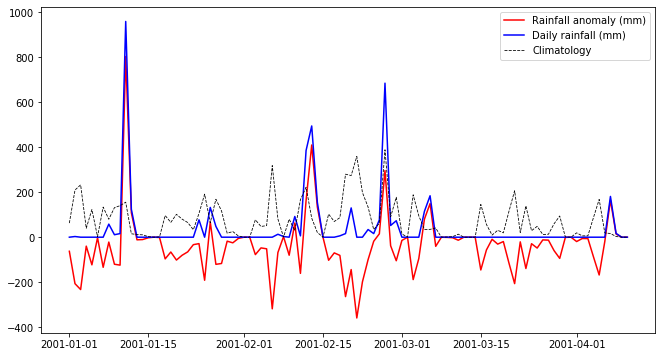

In [41]:
# Plot climatology mean, daily rainfall, rainfall anomaly  
fig,ax=plt.subplots(figsize=(11,6))
ax.plot(Depth_anom[:100],color='r',label='Rainfall anomaly (mm)')
ax.plot(Depth_day[:100],color='b',label='Daily rainfall (mm)')
ax.plot(Depth_anom.index[:100],Depth_clim.values[:100],lw=0.8,linestyle='--',color='k',label='Climatology')
plt.legend()